# Lecture 21: Intro to Nerual Netwroks

Plan:
1. Set up imports
2. Load CIFAR-10 images using pickle
3. Write a function to view an image
4. train/test split
5. Model fitting
6. Accuracy evalution
7. look at loss curve (feel loss)
8. Investigate how hidden layer affects loss curve
8. Activity: Investigate how the maximun iterations affects loss curve


In [2]:
# set up imports
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [3]:
# load the CIFAR-10 data
with open('cifar_data', 'rb') as file:
    cifar_data = pickle.load(file, encoding='latin1')

type(cifar_data)

dict

In [4]:
# gt image data and label data
image_data = cifar_data['data']
label_data = cifar_data['labels']

len(label_data)

10000

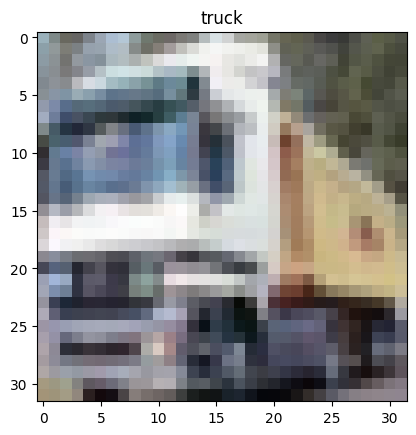

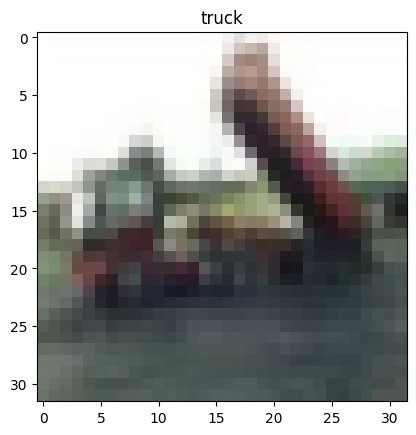

In [5]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# display first image
#image = image_data[0]
#label = label_data[0]

def show_image(image, label):

    # reshape image data into (3 x 32 x 32)
    img = image.reshape(3, 32, 32)

    #reorder the dimensions for matplotlib
    img = img.transpose(1, 2, 0)

    plt.imshow(img)
    plt.title(label_names[label])
    plt.show()

#print(label_data[0])
show_image(image_data[1], label_data[1])
show_image(image_data[2], label_data[2])

In [6]:
# do train/test split
X_train, X_test, y_train, y_test = train_test_split(image_data, label_data, random_state=42)

X_train.shape

(7500, 3072)

In [7]:
#define our model
clf = MLPClassifier(hidden_layer_sizes=(100,100), random_state=42)

#Train the model

clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), random_state=42)

In [8]:
# make predictions
y_pred = clf.predict(X_test)

#determine the accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.3308

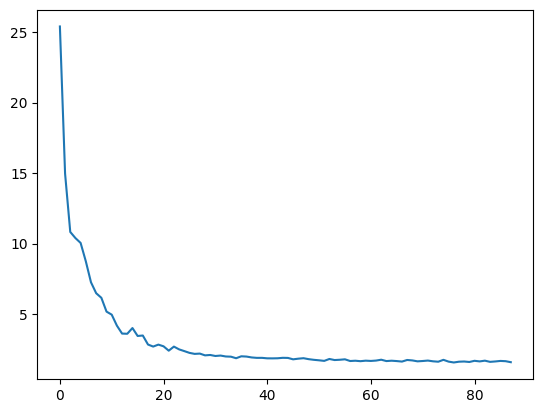

In [10]:
#get loss curve data
loss_data = clf.loss_curve_

loss_data
plt.plot(loss_data)

In [ ]:
# investigate how hidden layer affect accuracy
hidden_layer_sizes = [
    (50,),
    (100,),
    (100,100),
    (100, 100, 100),
]

loss_data_list = []

#loop over hidden layer shapes, train model and record accuracy
for hidden_layer_size in hidden_layer_sizes:
    print(hidden_layer_size)
    #define the  model
    clf = MLPClassifier(
        hidden_layer_sizes=hidden_layer_size, 
        batch_size=500, 
        learning_rate_init=0.0001,
        learning_rate='adaptive',
        random_state=42)

    #train the model
    clf.fit(X_train, y_train)

    #make predictions
    y_pred = clf.predict(X_test)

    #add the loss curve to our list
    loss_data_list.append(clf.loss_curve_)


loss_data_list

(50,)
(100,)
(100, 100)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(100, 100, 100)


In [20]:
#check accuracy of the (100,100,100) model with slow learning
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

accuracy

0.3532

In [18]:
#convert loss data to df
loss_df = pd.DataFrame(loss_data_list)

#transpose the dataframe
loss_df = loss_df.T

#label the columns
labels = [str(shape) for shape in hidden_layer_sizes]
loss_df.columns = labels

loss_df

,"(50,)","(100,)","(100, 100)","(100, 100, 100)"
0,28.796402,27.424067,25.175115,18.890543
1,25.398315,23.637047,18.113795,10.952654
2,22.335466,21.712277,14.228224,7.850778
3,4.486711,19.987476,12.185567,6.065278
4,2.551248,18.589050,10.432598,5.105263
...,...,...,...,...
195,NaN,NaN,0.992712,0.819116
196,NaN,NaN,1.026714,0.842787
197,NaN,NaN,1.044376,0.838872
198,NaN,NaN,0.978806,0.825043


<Axes: >

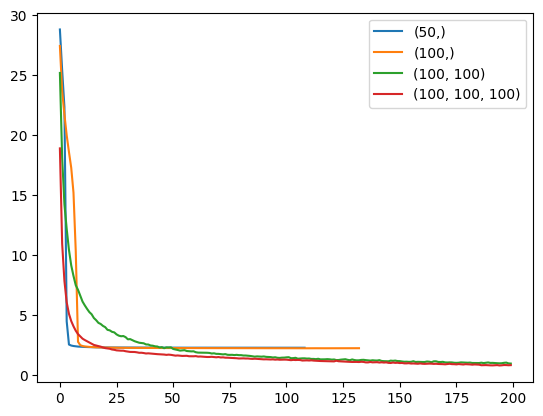

In [19]:
loss_df.plot()
